In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
#Heart ('reprocessed.hungarian.data')
data2 = np.loadtxt('reprocessed.hungarian.data') #quitar el .txt si el archivo no lo tiene
aa = data2[:,-1] != 0. 
data2[:,-1][aa] = np.round(1)
#data = pd.read_csv('Heart.csv')

In [3]:
#si se usa un archivo .csv pero se deben redefinir todas las columnas que son str a int
#X2 = np.array(data[data.keys()[1:-1]])
#YY = np.array(data[data.keys()[-1]])
#a = YY == 'Yes'
#Y2 = np.int_(np.zeros(len(YY)))
#Y2[a] = 1

In [4]:
#si se usa un archivo separado por espacios
Y2 = np.int_(np.array(data2[:,-1]).reshape(-1,1))
X2 = np.array(data2[:,:-1])

In [5]:
def Boot_strap_func(X,Y,No,Yes,num_boot):
    X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.25)
    A_0 = np.zeros(len(y_test))
    for i in range(num_boot):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
        clf = DecisionTreeClassifier()
        clf.fit(X_train,y_train)
        Y_pred = clf.predict(X_test)
        for i in range(len(y_test)):
            if Y_pred[i] == 0:
                A_0[i] += 1
    a = A_0 <= 0.5*num_boot
    Y_def = np.array([No]*len(A_0))
    Y_def[a] = Yes
    cm = confusion_matrix(y_test, Y_def)
    return cm

In [6]:
max_bootstraps = 200
E_test_list = []
bootstraps_list = []
for bootstraps in range(2, max_bootstraps + 1):
    clf = DecisionTreeClassifier()
    cm_test = Boot_strap_func(X2,Y2,0,1,bootstraps)
    E_test_list.append((cm_test[0,1] + cm_test[1,0])/(cm_test[0,0] + cm_test[0,1] + cm_test[1,0] + cm_test[1,1]))
    bootstraps_list.append(bootstraps)

In [7]:
Y2 = np.int_(np.array(data2[:,-1]))
max_n_trees = 200
oob_list = []
rfE_test_list = []
n_trees_list = []
for n_trees in range(2, max_n_trees + 1):
    rf_clf = RandomForestClassifier(n_estimators=n_trees, oob_score=True, max_features=4)
    X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.5)
    rf_clf.fit(X2_train,Y2_train)
    Y2_rf_pred = rf_clf.predict(X2_test)
    rf_cm_test = confusion_matrix(Y2_test, Y2_rf_pred)
    rfE_test_list.append((rf_cm_test[0,1] + rf_cm_test[1,0])/(rf_cm_test[0,0] + rf_cm_test[0,1] + rf_cm_test[1,0] + rf_cm_test[1,1])) 
    n_trees_list.append(n_trees)
    oob_list.append(1 - rf_clf.oob_score_)

/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/srv/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees we

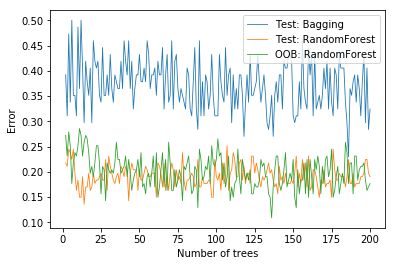

In [8]:
plt.plot(bootstraps_list, E_test_list, linewidth=0.8, label='Test: Bagging')
plt.plot(bootstraps_list, rfE_test_list, linewidth=0.8, label='Test: RandomForest')
plt.plot(bootstraps_list, oob_list, linewidth=0.8, label='OOB: RandomForest')
#plt.plot(bootstraps_list, E_train_list, label='Train')
#plt.plot(tree_size_list2, test_error2)
#plt.plot(tree_size_list2, train_error2)
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()
plt.show()

In [9]:
#OJ
data = pd.read_csv('OJ.csv')

In [10]:
X = np.array(data[['WeekofPurchase', 'StoreID', 'PriceCH',
       'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH',
       'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'PctDiscMM',
       'PctDiscCH', 'ListPriceDiff', 'STORE']])
Y = np.array(data['Purchase'])

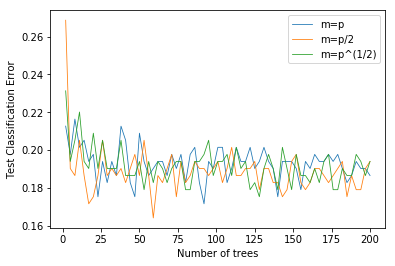

In [11]:
max_n_trees = 200
mf_list = ['m=p','m=p/2','m=p^(1/2)']
mf_count = 0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
for mf in [len(X[0,:]),np.int_(len(X[0,:])/2),np.int_(np.sqrt(len(X[0,:])))]:
    rfE_test_listOJ = []
    n_trees_listOJ = []
    for n_trees in range(2, max_n_trees + 1, 3):
        rf_clf = RandomForestClassifier(n_estimators=n_trees, max_features=mf)
        rf_clf.fit(X_train,Y_train)
        Y_rf_pred = rf_clf.predict(X_test)
        rf_cm_test = confusion_matrix(Y_test, Y_rf_pred)
        rfE_test_listOJ.append((rf_cm_test[0,1] + rf_cm_test[1,0])/(rf_cm_test[0,0] + rf_cm_test[0,1] + rf_cm_test[1,0] + rf_cm_test[1,1])) 
        n_trees_listOJ.append(n_trees)
    mf_count += 1 
    plt.plot(n_trees_listOJ, rfE_test_listOJ, linewidth=0.8, label=mf_list[mf_count - 1])
plt.xlabel('Number of trees')
plt.ylabel('Test Classification Error')
plt.legend()
plt.show()

/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/srv/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


(0, 1)

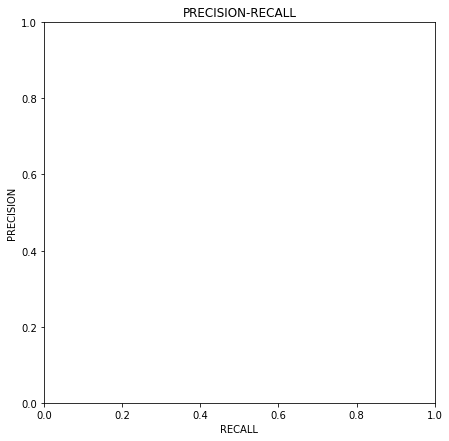

In [13]:
#segunda parte
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data = pd.read_csv('OJ.csv')
X = np.array(data[['WeekofPurchase', 'StoreID', 'PriceCH',
       'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH',
       'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'PctDiscMM',
       'PctDiscCH', 'ListPriceDiff', 'STORE']])
Y = np.array(data['Purchase'])

# modelos
lr = LogisticRegression()
lda = LinearDiscriminantAnalysis()
ct = DecisionTreeClassifier(max_depth=3) #3 es el tamano optimo del tree (probado en otro notebook)
rf = RandomForestClassifier(n_estimators=100, max_features='sqrt') #num. de arboles sera 100 (aca se estabiliza)
                                                                   #m=sqrt(p) se consigue el mejor resultado
                                                                   #probado en otro notebook
    
# train y test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.5)

#  Fit los 4 modelos con train
lr.fit(X_train, Y_train) #logistic regression
lda.fit(X_train, Y_train) #linear discrimination analysis
ct.fit(X_train, Y_train) #classification tree
rf.fit(X_train, Y_train) #random forest

# Predict con los 4 modelos
lr_pred = lr.predict(X_test)
lda_pred = lda.predict(X_test)
ct_pred = ct.predict(X_test)
rf_pred = rf.predict(X_test)

# probabilidad de 'Purchase'='CH' 
lr_proba_CH = lr.predict_proba(X_test)[:,1]
lda_proba_CH = lda.predict_proba(X_test)[:,1]
ct_proba_CH = ct.predict_proba(X_test)[:,1]
rf_proba_CH = rf.predict_proba(X_test)[:,1]

# loop over n_p different values for the threshold probabiity
n_p = 100
threshold = np.linspace(0,0.99, n_p)

#error_rate = np.zeros(n_p)
lr_precision = np.zeros(n_p)
lr_recall = np.zeros(n_p)
lr_tp_rate = np.zeros(n_p)
lr_fp_rate = np.zeros(n_p)

lda_precision = np.zeros(n_p)
lda_recall = np.zeros(n_p)
lda_tp_rate = np.zeros(n_p)
lda_fp_rate = np.zeros(n_p)

ct_precision = np.zeros(n_p)
ct_recall = np.zeros(n_p)
ct_tp_rate = np.zeros(n_p)
ct_fp_rate = np.zeros(n_p)

rf_precision = np.zeros(n_p)
rf_recall = np.zeros(n_p)
rf_tp_rate = np.zeros(n_p)
rf_fp_rate = np.zeros(n_p)
threshold = np.linspace(0,0.99, n_p)

for i in range(n_p):
    
    lr_ii = lr_proba_CH > threshold[i]
    lr_pred[lr_ii] = 'CH'
    lr_pred[~lr_ii] = 'MM'
    lr_true_positive = (Y_test == 'Yes') & (lr_pred == 'Yes') 
    lr_false_positive = (Y_test == 'No') & (lr_pred == 'Yes')
    lr_false_negative = (Y_test == 'Yes') & (lr_pred == 'No')
    lr_true_negative = (Y_test == 'No') & (lr_pred == 'No')
    lr_n_tp = np.count_nonzero(lr_true_positive)
    lr_n_fp= np.count_nonzero(lr_false_positive)
    lr_n_fn = np.count_nonzero(lr_false_negative)
    lr_n_tn = np.count_nonzero(lr_true_negative)
    if((lr_n_tp+lr_n_fp)>0): lr_precision[i] = lr_n_tp/(lr_n_tp + lr_n_fp)
    if((lr_n_tp+lr_n_fn)>0): lr_recall[i] = lr_n_tp/(lr_n_tp + lr_n_fn); 

    lda_ii = lda_proba_CH > threshold[i]
    lda_pred[lda_ii] = 'CH'
    lda_pred[~lda_ii] = 'MM'
    lda_true_positive = (Y_test == 'Yes') & (lda_pred == 'Yes') 
    lda_false_positive = (Y_test == 'No') & (lda_pred == 'Yes')
    lda_false_negative = (Y_test == 'Yes') & (lda_pred == 'No')
    lda_true_negative = (Y_test == 'No') & (lda_pred == 'No')
    lda_n_tp = np.count_nonzero(lda_true_positive)
    lda_n_fp= np.count_nonzero(lda_false_positive)
    lda_n_fn = np.count_nonzero(lda_false_negative)
    lda_n_tn = np.count_nonzero(lda_true_negative)
    if((lda_n_tp+lda_n_fp)>0): lda_precision[i] = lda_n_tp/(lda_n_tp + lda_n_fp)
    if((lda_n_tp+lda_n_fn)>0): lda_recall[i] = lda_n_tp/(lda_n_tp + lda_n_fn);
    
    ct_ii = ct_proba_CH > threshold[i]
    ct_pred[ct_ii] = 'CH'
    ct_pred[~ct_ii] = 'MM'
    ct_true_positive = (Y_test == 'Yes') & (ct_pred == 'Yes') 
    ct_false_positive = (Y_test == 'No') & (ct_pred == 'Yes')
    ct_false_negative = (Y_test == 'Yes') & (ct_pred == 'No')
    ct_true_negative = (Y_test == 'No') & (ct_pred == 'No')
    ct_n_tp = np.count_nonzero(ct_true_positive)
    ct_n_fp= np.count_nonzero(ct_false_positive)
    ct_n_fn = np.count_nonzero(ct_false_negative)
    ct_n_tn = np.count_nonzero(ct_true_negative)
    if((ct_n_tp+ct_n_fp)>0): ct_precision[i] = ct_n_tp/(ct_n_tp + ct_n_fp)
    if((ct_n_tp+ct_n_fn)>0): ct_recall[i] = ct_n_tp/(ct_n_tp + ct_n_fn);
        
    rf_ii = rf_proba_CH > threshold[i]
    rf_pred[rf_ii] = 'CH'
    rf_pred[~rf_ii] = 'MM'
    rf_true_positive = (Y_test == 'Yes') & (rf_pred == 'Yes') 
    rf_false_positive = (Y_test == 'No') & (rf_pred == 'Yes')
    rf_false_negative = (Y_test == 'Yes') & (rf_pred == 'No')
    rf_true_negative = (Y_test == 'No') & (rf_pred == 'No')
    rf_n_tp = np.count_nonzero(rf_true_positive)
    rf_n_fp= np.count_nonzero(rf_false_positive)
    rf_n_fn = np.count_nonzero(rf_false_negative)
    rf_n_tn = np.count_nonzero(rf_true_negative)
    if((rf_n_tp+rf_n_fp)>0): rf_precision[i] = rf_n_tp/(rf_n_tp + rf_n_fp)
    if((rf_n_tp+rf_n_fn)>0): rf_recall[i] = rf_n_tp/(rf_n_tp + rf_n_fn);

plt.figure(figsize=(7,7))
plt.plot(lr_recall, lr_precision)
plt.plot(lda_recall, lda_precision)
plt.plot(ct_recall, ct_precision)
plt.plot(rf_recall, rf_precision)

plt.xlabel('RECALL')
plt.ylabel('PRECISION')
plt.title('PRECISION-RECALL')
plt.xlim([0,1])
plt.ylim([0,1])